<a href="https://colab.research.google.com/github/JackieVeatch/GCC_2025_PythonWorkshop/blob/main/GCC_AUVworkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Welcome to the AUV (2D data) breakout group!
Jacquelyn Veatch, November 8th 2025 <br> <br>
In this notebook, we will load in AUV data from a slocum glider. This code will build upon what we learned in "GCC_PythonReview.ipynb", and then explore more data visualization and statistical methods in common Python packages! <br> <br>

The challenge with glider data is that this instrument propels forward as it profiles the ocean, resolving environmental changes in both space and time. Learn more about gliders here! https://www.teledynemarine.com/brands/webb-research/slocum-glider <br> <br>

This notebook was modified from Joe Gradone's notebook! Thanks Joe, you rock! https://github.com/JGradone/Topics-Sentinel

In [ ]:
# it's considered best practice to have all your imports at the beginning of your code
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.signal import find_peaks

## Let's load some glider data now!

Here's a recent photo from our friends at Teledyne Webb Research of the Redwing Sentinel Glider doing some testing in their (protected) company courtyard.

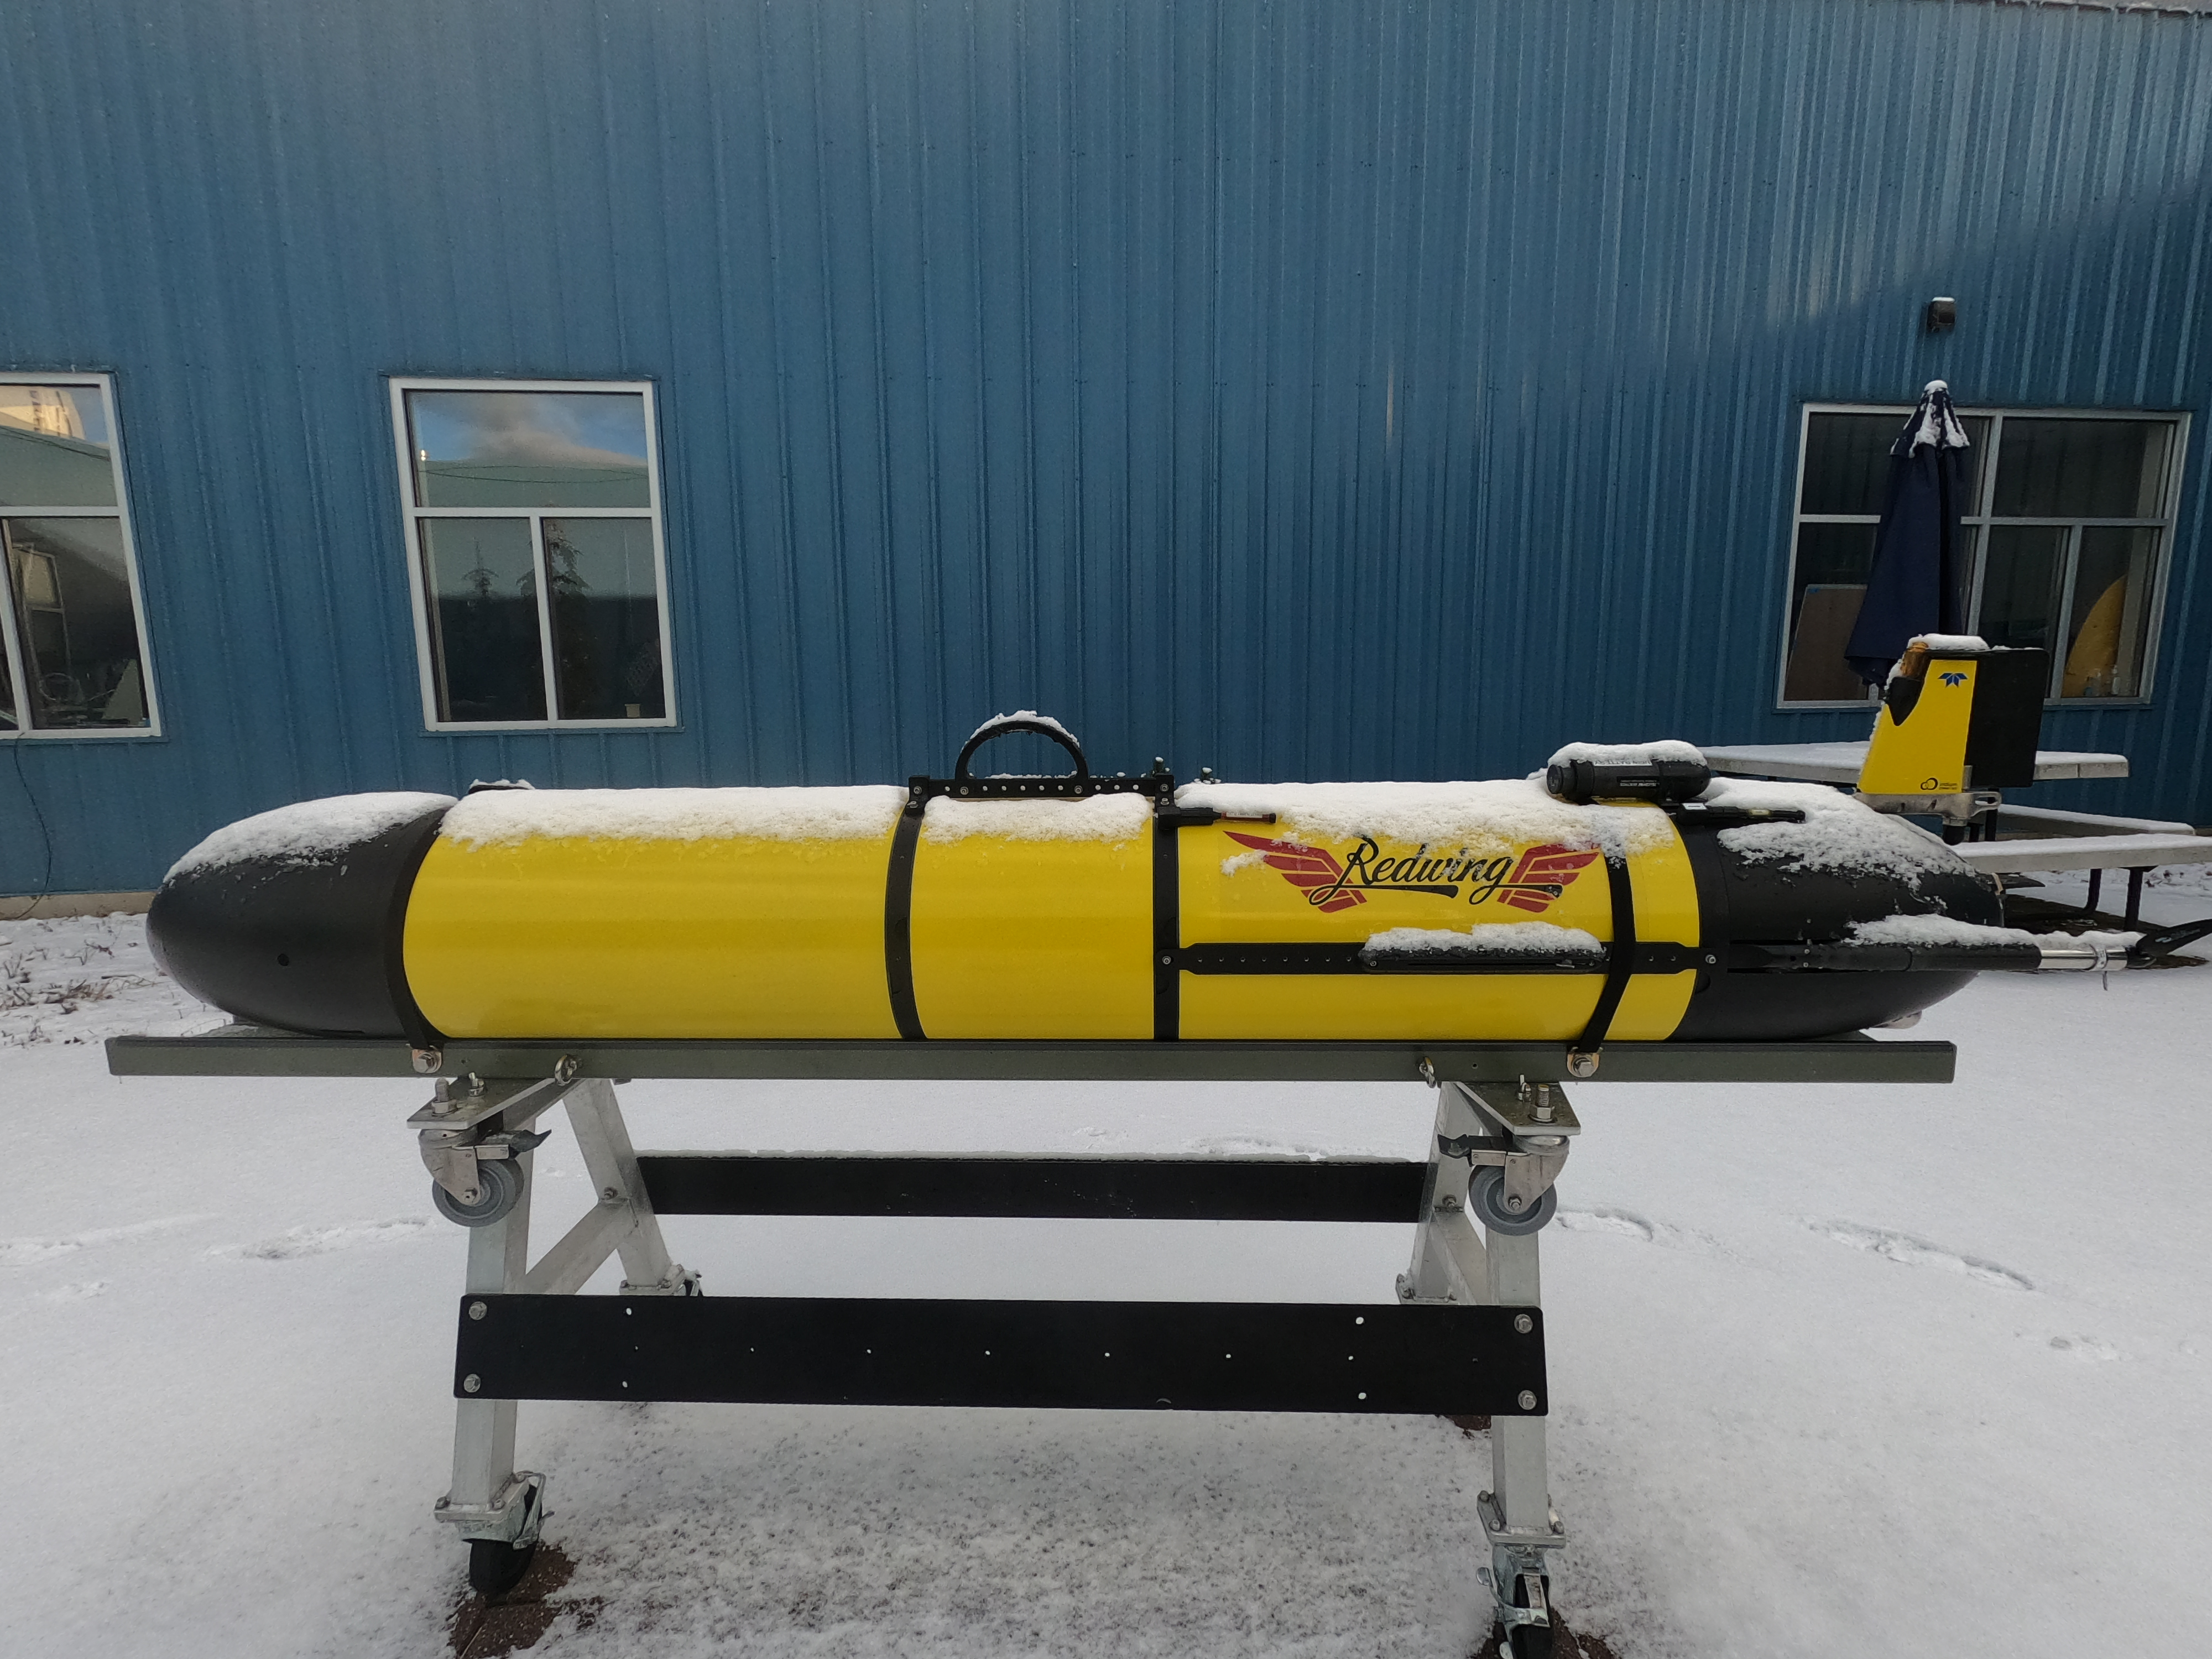

## Pandas is another package that can be used to read and manipulate data.

Here we will use it to read in a text file I made and stored in my GitHub of glider data.

In [ ]:
## This is a path to where this text file is stored on my GitHub
url = 'https://raw.githubusercontent.com/JGradone/Topics-Sentinel/07e0670930302ac3fd1e4e3c5d27ce0c63c9bd0c/Sentinel_Slocum_CTD_Comparison.txt'

## Load the text file with the read_csv() function from pandas
df = pd.read_csv(url)
## Take a peak at what it looks like
df

To access a specific variable from this dataframe, we can use the following structure (otherwise known as syntax in the coding world)

In [ ]:
df.sentinel_temperature

## Now let's make some plots.

To do this we can use the [matplotlib](https://matplotlib.org/) package

In [ ]:
## This makes a plot of the depth of the sentinel glider
plt.plot(df.sentinel_depth)
## Change the y limit to be increasing from top to bottom
plt.ylim(25,-1)
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Depth [m]')
plt.xlabel('Time [seconds since mission start]')

This dataframe has data from both a Sentinel glider and an original Slocum glider deployed near each other in Cape Cod Bay.

Let's visualize them together by copying and pasting the code from above and modifying it a bit.

In [ ]:
## This makes a plot of the depth of the sentinel glider
plt.plot(df.sentinel_depth,label='Sentinel')
## This makes a plot of the depth of the original slocum glider
plt.plot(df.slocum_depth,label='Slocum')

## Change the y limit to be increasing from top to bottom
plt.ylim(25,-1)
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Depth [m]')
plt.xlabel('Time [seconds since mission start]')
## Add a legend
plt.legend()

So, we can see the Slocum might have done more "yos" at depth compared to the Sentinel, but they covered the same depth range

This is good to check because now when we compare the CTD data, we'll know it is representative of a similar picture of the ocean. For simplicity, I don't have time, latitude, or longitude in this dataset so we can just assume the gliders are in a similar location at the same time.

### Let's start by comparing the temperature data

In [ ]:
## Plot temperature on the x-axis and depth on the y-axis
plt.plot(df.sentinel_temperature,df.sentinel_depth,label='Sentinel')
plt.plot(df.slocum_temperature,df.slocum_depth,label='Slocum')
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Depth [m]')
plt.xlabel('Temperature [C]')
## Add a legend
plt.legend()

## Woah, this looks weird!

What do we thing could be causing this?

## Let's fix the x-axis and y-axis limits to only contain data below the surface and then scale the temperature axis accordingly

In [ ]:
## Plot temperature on the x-axis and depth on the y-axis
plt.plot(df.sentinel_temperature,df.sentinel_depth,label='Sentinel')
plt.plot(df.slocum_temperature,df.slocum_depth,label='Slocum')
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Depth [m]')
plt.xlabel('Temperature [C]')
## Add a legend
plt.legend()
## Change axis limits
plt.xlim(2.8,3.5)
plt.ylim(25,0)

## Now let's compare the salinity data

In [ ]:
## Plot temperature on the x-axis and depth on the y-axis
plt.plot(df.sentinel_salinity,df.sentinel_depth,label='Sentinel')
plt.plot(df.slocum_salinity,df.slocum_depth,label='Slocum')
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Depth [m]')
plt.xlabel('Salinity [g/kg]')
## Add a legend
plt.legend()
## Change axis limits
#plt.xlim(2.8,3.5)
plt.ylim(25,0)

## Huh, seems like we need to scale salinity on the x-axis appropriately here too.

Some erroneous salinity values from when the glider was taking measurements in air are throwing off the comparison.

In [ ]:
## Plot temperature on the x-axis and depth on the y-axis
plt.plot(df.sentinel_salinity,df.sentinel_depth,label='Sentinel')
plt.plot(df.slocum_salinity,df.slocum_depth,label='Slocum')
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Depth [m]')
plt.xlabel('Salinity [g/kg]')
## Add a legend
plt.legend()
## Change axis limits
plt.xlim(31.5,32.5)
plt.ylim(25,0)

## Well this seems weird for sure!

Let's look at this in T/S space as well.

**Note:** For this plot I am using the scatter() function to plot just points instead of lines.

In [ ]:
## Plot temperature on the x-axis and depth on the y-axis
plt.scatter(df.sentinel_salinity,df.sentinel_temperature,label='Sentinel')
plt.scatter(df.slocum_salinity,df.slocum_temperature,label='Slocum')
## Add grid lines
plt.grid()
## Add axis labels
plt.ylabel('Temperature [C]')
plt.xlabel('Salinity [g/kg]')
## Add a legend
plt.legend()
## Change axis limits
plt.xlim(31.5,32.5)
plt.ylim(2.8,3.5)


##I'll give you the answer to our troubles for this one, it's something called **thermal lag!**

Thermal lag is a phenomenon that occurs when a CTD moves from warmer to colder water, causing errors in salinity calculations. This is because the conductivity cell stores heat and releases it more slowly (lag) than the temperature sensor.

The Sentinel glider has an *unpumped CTD*, where water flows past the conductivity cell as the glider dives and climbs. The original Slocum glider has a *pumped CTD*, where there is a little "pump" of sorts to flush water past the conductivity cell and prevent this error from happening.

It is not as easy to see in our data because I don't have the data divided into upcasts and downcasts specifically like below.

This figure from [Garau et al. (2011)](https://journals.ametsoc.org/view/journals/atot/28/9/jtech-d-10-05030_1.xml) illustrates this well:

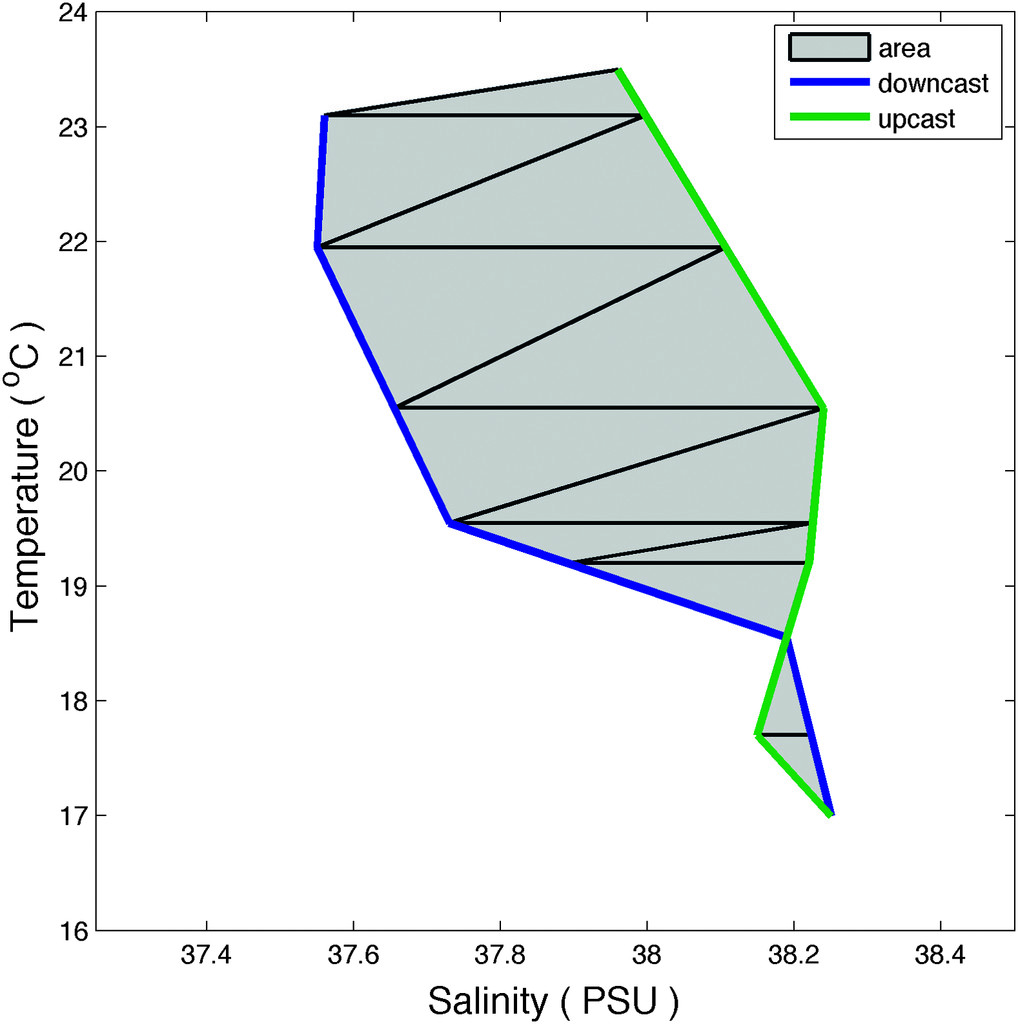

### Now that we know how to handle these data, let's make some more visualizations!

It is often helpful to slice glider data into "profiles". To do this, we can locate local minimum and maximum in the depth data to determine what the glider is "turning around" at the beginning and end of a dive or climb.

In [ ]:
# first, create a function that identifies local minimum and maximum in the depth data
def extrema_and_profiles(depth_series, prominence=0.5, distance=30, smooth_window=5):
    """
    depth_series: pandas Series of depth (m, positive downward) indexed by sample/time
    prominence, distance: tweak to control how many extrema are detected
    smooth_window: median window (samples) used to suppress noise before peak finding
    """
    y = np.asarray(depth_series, dtype=float)

    # light smoothing for stability (optional but helps noisy AUV data)
    y_s = pd.Series(y).rolling(smooth_window, center=True, min_periods=1).median().to_numpy()

    # local maxima (deepest points in a dive) and local minima (near-surface tops)
    max_idx, _ = find_peaks(y_s, prominence=prominence, distance=distance)
    min_idx, _ = find_peaks(-y_s, prominence=prominence, distance=distance)

    # merge, sort, and enforce alternating min/max sequence
    ex = [(int(i), 'min') for i in min_idx] + [(int(i), 'max') for i in max_idx]
    ex.sort(key=lambda t: t[0])

    # drop consecutive duplicates (e.g., min then min) so sequence alternates
    cleaned = []
    last_type = None
    for i, kind in ex:
        if kind != last_type:
            cleaned.append((i, kind))
            last_type = kind
    ex = cleaned

    # ensure we start with a 'min' (first dive goes min→max)
    while ex and ex[0][1] != 'min':
        ex.pop(0)
    # ensure we end at an extrema boundary
    if len(ex) < 2:
        # not enough extrema to segment
        profile_id = np.zeros_like(y, dtype=int)
        return np.array([]), np.array([]), profile_id

    # build profile ids by labeling intervals between consecutive extrema
    profile_id = np.zeros_like(y, dtype=int)
    pid = 1
    for (i0, k0), (i1, k1) in zip(ex[:-1], ex[1:]):
        profile_id[i0:i1+1] = pid
        pid += 1
    # indices of mins/maxes for plotting
    mins = np.array([i for i, k in ex if k == 'min'], dtype=int)
    maxs = np.array([i for i, k in ex if k == 'max'], dtype=int)
    return mins, maxs, profile_id


In [ ]:
# next, use the function defined above to locate the local extrema where the glider "turns around"
# --- Run for each glider series ---
mins_sen, maxs_sen, prof_sen = extrema_and_profiles(df.sentinel_depth, prominence=0.6, distance=40)
mins_slo, maxs_slo, prof_slo = extrema_and_profiles(df.slocum_depth,   prominence=0.6, distance=40)

# --- Plot with red dots at local extrema ---
plt.figure(figsize=(7, 4.5))
plt.plot(df.sentinel_depth.values, label='Sentinel')
plt.plot(df.slocum_depth.values,   label='Slocum')

# red dots at extrema (filled for maxima, hollow for minima so they’re distinguishable)
plt.scatter(mins_sen, df.sentinel_depth.values[mins_sen], s=28, facecolors='none', edgecolors='red', zorder=3)
plt.scatter(maxs_sen, df.sentinel_depth.values[maxs_sen], s=28, c='red', zorder=3)
plt.scatter(mins_slo, df.slocum_depth.values[mins_slo], s=28, facecolors='none', edgecolors='red', zorder=3)
plt.scatter(maxs_slo, df.slocum_depth.values[maxs_slo], s=28, c='red', zorder=3)

plt.ylim(25, -1)          # depth increasing downward
plt.grid(True, alpha=0.4)
plt.ylabel('Depth [m]')
plt.xlabel('Time [seconds since mission start]')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# sanity check: how many profiles does each glider have?
print(np.max(prof_sen))
print(np.max(prof_slo))

In [ ]:
#The per-sample profile numbers are now in prof_sen and prof_slo, add them to you dataframe
df['sentinel_profile'] = prof_sen
df['slocum_profile']   = prof_slo

In [ ]:
# notice that your dataframe now contains two new data columns
df

Now we can use the profile number to index the data, handling one profile at a time.

In [ ]:
# Choose which profile to plot (for example, profile 3)
profile_to_plot = 3

# Select data belonging to that profile
mask = df['slocum_profile'] == profile_to_plot
prof = df.loc[mask]

# Plot depth vs. time for that profile
plt.figure(figsize=(6, 4))
plt.plot(prof.index, prof['slocum_depth'], color='orange', lw=2)
plt.gca().invert_yaxis()  # make depth increase downward
plt.xlabel('Time [seconds since mission start]')
plt.ylabel('Depth [m]')
plt.title(f'Slocum Glider — Profile {profile_to_plot}')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Try it on your own
(1) fill out the code below to plot the 4th Slocum Glider profile of Temperature vs. Depth <br>
(2) plot the first 5 profiles all on one plot <br>
(3) challenge: go to the CTDworkbook and look for the code that defines mixed layer depth in profiled data. Outfit that code to define mixed layer depths for each profile of glider data.

In [ ]:
# Choose which profile to plot (for example, profile 3)
profile_to_plot = __

# Extract data for that profile
mask = df['slocum_profile'] == profile_to_plot
prof = df.loc[mask]

# Plot Temperature vs Depth
plt.figure(figsize=(5, 6))
plt.plot(prof[___], prof[___], color='orange', lw=2)

# Reverse y-axis (depth increasing downward)
plt.gca().invert_yaxis()

plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title(f'Slocum Glider – Temperature Profile {profile_to_plot}')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()